In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib 
%matplotlib inline
import scipy
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats
import datetime
import json 
sns.set()
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('train_news.csv', engine='python')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25116 entries, 0 to 25115
Columns: 686 entries, Unnamed: 0 to Unnamed: 685
dtypes: float64(20), object(666)
memory usage: 131.5+ MB


In [4]:
df.head()

,Unnamed: 0,id,headline,written_by,news,label,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 676,Unnamed: 677,Unnamed: 678,Unnamed: 679,Unnamed: 680,Unnamed: 681,Unnamed: 682,Unnamed: 683,Unnamed: 684,Unnamed: 685
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Unnamed: 543,Unnamed: 556,Unnamed: 561,Unnamed: 564,Unnamed: 565,Unnamed: 566,Unnamed: 574,Unnamed: 581,Unnamed: 585,Unnamed: 592,Unnamed: 601,Unnamed: 607,Unnamed: 612,Unnamed: 617,Unnamed: 621,Unnamed: 625,Unnamed: 654,Unnamed: 675,Unnamed: 683,Unnamed: 685
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1992.0,1972.0,1990.0,183.0,187.0,194.0,1992.0,1991.0,1988.0,1973.0,1992.0,1975.0,1975.0,1975.0,1977.0,1979.0,1977.0,1986.0,1991.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1992.0,1972.0,1990.0,183.0,187.0,194.0,1992.0,1991.0,1988.0,1973.0,1992.0,1975.0,1975.0,1975.0,1977.0,1979.0,1977.0,1986.0,1991.0,1.0
25%,1992.0,1972.0,1990.0,183.0,187.0,194.0,1992.0,1991.0,1988.0,1973.0,1992.0,1975.0,1975.0,1975.0,1977.0,1979.0,1977.0,1986.0,1991.0,1.0
50%,1992.0,1972.0,1990.0,183.0,187.0,194.0,1992.0,1991.0,1988.0,1973.0,1992.0,1975.0,1975.0,1975.0,1977.0,1979.0,1977.0,1986.0,1991.0,1.0
75%,1992.0,1972.0,1990.0,183.0,187.0,194.0,1992.0,1991.0,1988.0,1973.0,1992.0,1975.0,1975.0,1975.0,1977.0,1979.0,1977.0,1986.0,1991.0,1.0
max,1992.0,1972.0,1990.0,183.0,187.0,194.0,1992.0,1991.0,1988.0,1973.0,1992.0,1975.0,1975.0,1975.0,1977.0,1979.0,1977.0,1986.0,1991.0,1.0


In [6]:
data= df[["id", "headline","written_by","news","label"]] 
data

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
25111,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
25112,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
25113,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
25114,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"Itâ€™s officially summer, and the Society Bout...",0


In [7]:
print ('Shape = >',data.shape)

Shape = > (25116, 5)


In [8]:
print ('fake and not fake','\n',data.label.value_counts())

fake and not fake 
 1                                                                  10371
0                                                                  10350
 Brisbane Water National Park                                          2
 Arizona in the USA.                                                   2
 Ñ‚Ð¾                                                                  2
                                                                   ...  
 Ð±Ñ‹Ð»Ð¸ Ñ�Ñ„Ð¾Ñ€Ð¼ÑƒÐ»Ð¸Ñ€Ð¾Ð²Ð°Ð½Ñ‹ Ñ€ÐµÐ°Ð»Ð¸Ñ�Ñ‚Ð¸Ñ‡Ð½Ñ‹Ðµ        1
 â€“ ÐµÑ�Ñ‚ÑŒ Ð»Ð¸ ÐºÐ°ÐºÐ¸Ðµâ€‘Ñ‚Ð¾ ÑˆÐ°Ð³Ð¸                          1
 Ð½Ð¾ Ð³Ð¾Ñ�Ð¿Ð¾Ð´Ð¸Ð½ ÐŸÑƒÑ‚Ð¸Ð½                                      1
 Ð¾Ð±Ð»Ð¾Ð¶ÐºÐ¸ Ñ�Ð¼Ð¾Ñ‚Ñ€Ð¸Ð¼                                         1
 with holding                                                          1
Name: label, Length: 738, dtype: int64


In [9]:
#New column for Length of message
data['length'] = data.news.str.len()
data.head(5)

<ipython-input-9-0bf50fe07196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.news.str.len()


,id,headline,written_by,news,label,length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0,8064.0
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0,6253.0
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0,441.0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0,6662.0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9290.0


In [10]:
data.dropna()

,id,headline,written_by,news,label,length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0,8064.0
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0,6253.0
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0,441.0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0,6662.0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9290.0
...,...,...,...,...,...,...
25110,366,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0,20388.0
25112,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,6737.0
25113,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,3473.0
25114,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"Itâ€™s officially summer, and the Society Bout...",0,2342.0


In [11]:
data.head()

,id,headline,written_by,news,label,length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0,8064.0
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0,6253.0
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0,441.0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0,6662.0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9290.0


In [12]:
data['detail_news']= data["headline"].astype(str) +" "+ data["news"].astype(str)
data.head(5)

<ipython-input-12-e27838cdf6c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['detail_news']= data["headline"].astype(str) +" "+ data["news"].astype(str)


,id,headline,written_by,news,label,length,detail_news
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0,8064.0,Ethics Questions Dogged Agriculture Nominee as...
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0,6253.0,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0,441.0,Cotton to House: â€™Do Not Walk the Plank and ...
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0,6662.0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9290.0,A Digital 9/11 If Trump Wins Finian Cunningh...


In [14]:
data.drop('headline',axis=1,inplace=True)
data.drop('news',axis=1,inplace=True)
data.head()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,written_by,label,length,detail_news
0,9653,Eric Lipton and Steve Eder,0,8064.0,Ethics Questions Dogged Agriculture Nominee as...
1,10041,David Waldstein,0,6253.0,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...
2,19113,Pam Key,0,441.0,Cotton to House: â€™Do Not Walk the Plank and ...
3,6868,Jess Bidgood,0,6662.0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,7596,Finian Cunningham,1,9290.0,A Digital 9/11 If Trump Wins Finian Cunningh...


In [15]:
# New column (clean_length) after puncuations,stopwords removal
data['clean_length'] = data.detail_news.str.len()
data.head()

<ipython-input-15-68711f072451>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_length'] = data.detail_news.str.len()


,id,written_by,label,length,detail_news,clean_length
0,9653,Eric Lipton and Steve Eder,0,8064.0,Ethics Questions Dogged Agriculture Nominee as...,8149
1,10041,David Waldstein,0,6253.0,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,6328
2,19113,Pam Key,0,441.0,Cotton to House: â€™Do Not Walk the Plank and ...,546
3,6868,Jess Bidgood,0,6662.0,"Paul LePage, Besieged Maine Governor, Sends Co...",6763
4,7596,Finian Cunningham,1,9290.0,A Digital 9/11 If Trump Wins Finian Cunningh...,9319


In [16]:
# Total length removal
print ('Origian Length',data.length.sum())
print ('Clean Length', data.clean_length.sum())

Origian Length 94755178.0
Clean Length 96487465


In [17]:
def clean_text(text, remove_stopwords = True):
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text,  
                  flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
    return text

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


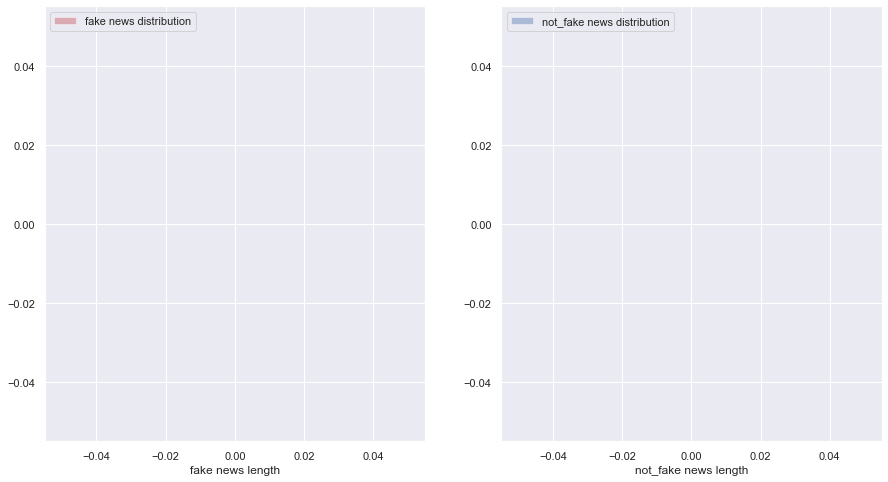

In [18]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data[data['label']==' fake']['length'],bins=20,ax=ax[0],label='fake news distribution',color='r')

ax[0].set_xlabel('fake news length')
ax[0].legend()

sns.distplot(data[data['label']=='not_fake']['length'],bins=20,ax=ax[1],label='not_fake news distribution')
ax[1].set_xlabel('not_fake news length')
ax[1].legend()

plt.show()

In [19]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
import wordcloud

In [21]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done


## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-4.9.2-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [23]:
conda update -n base -c defaults conda

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - conda


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.2-py38haa244fe~ --> pkgs/main::conda-4.9.2-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



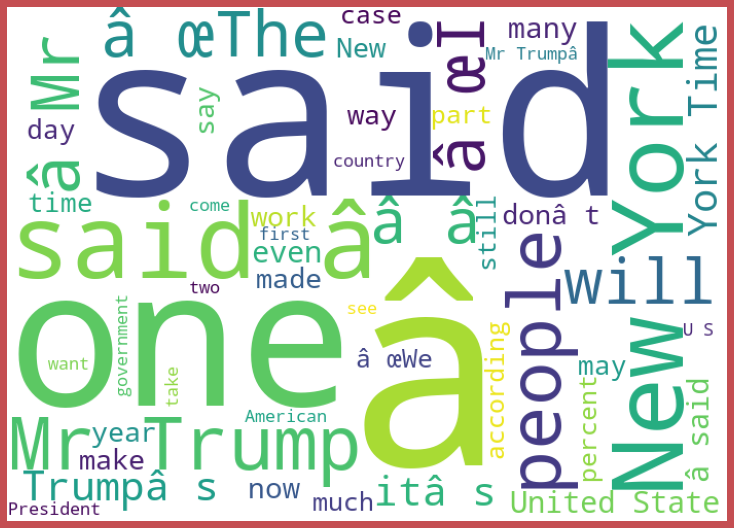

In [30]:
from wordcloud import WordCloud


not_fake = data['detail_news'][data['label']=='0']

not_fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(not_fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
data['label'].replace(0, 'not_fake',inplace=True)
data['label'].replace(1, 'fake',inplace=True)

In [29]:
data.head()

,id,written_by,label,length,detail_news,clean_length
0,9653,Eric Lipton and Steve Eder,0,8064.0,Ethics Questions Dogged Agriculture Nominee as...,8149
1,10041,David Waldstein,0,6253.0,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,6328
2,19113,Pam Key,0,441.0,Cotton to House: â€™Do Not Walk the Plank and ...,546
3,6868,Jess Bidgood,0,6662.0,"Paul LePage, Besieged Maine Governor, Sends Co...",6763
4,7596,Finian Cunningham,1,9290.0,A Digital 9/11 If Trump Wins Finian Cunningh...,9319


In [31]:
data.dtypes

id               object
written_by       object
label            object
length          float64
detail_news      object
clean_length      int64
dtype: object

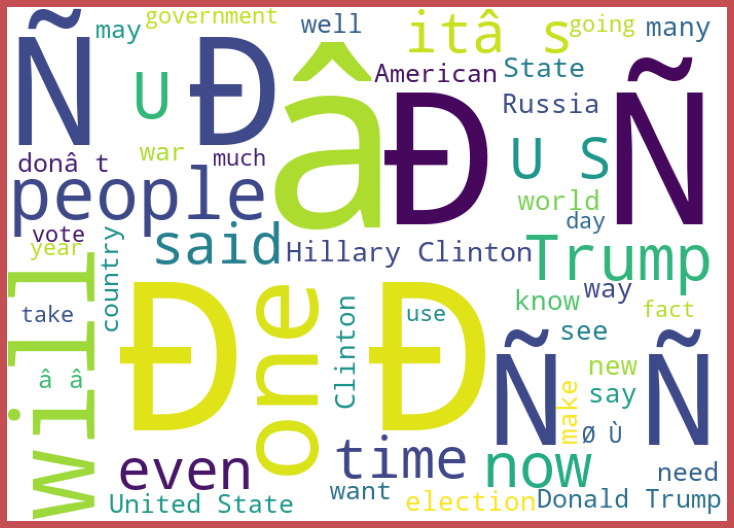

In [32]:
from wordcloud import WordCloud


fake = data['detail_news'][data['label']=='1']

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(data['detail_news'])

X = features
y = data['label']

In [45]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8803949673514891


In [36]:
data.isnull().sum()

id              1692
written_by      4997
label           3654
length          3401
detail_news        0
clean_length       0
dtype: int64

In [37]:
data.dropna()

,id,written_by,label,length,detail_news,clean_length
0,9653,Eric Lipton and Steve Eder,0,8064.0,Ethics Questions Dogged Agriculture Nominee as...,8149
1,10041,David Waldstein,0,6253.0,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,6328
2,19113,Pam Key,0,441.0,Cotton to House: â€™Do Not Walk the Plank and ...,546
3,6868,Jess Bidgood,0,6662.0,"Paul LePage, Besieged Maine Governor, Sends Co...",6763
4,7596,Finian Cunningham,1,9290.0,A Digital 9/11 If Trump Wins Finian Cunningh...,9319
...,...,...,...,...,...,...
25111,5671,NeverSurrender,1,69.0,"nan No, you'll be a dog licking of the vomit o...",73
25112,14831,Rixon Stewart,1,6737.0,Albert Pike and the European Migrant Crisis By...,6781
25113,18142,Eddy Lavine,1,3473.0,Dakota Access Caught Infiltrating Protests to ...,3558
25114,12139,Alison S. Cohn,0,2342.0,How to Stretch the Summer Solstice - The New Y...,2398


In [38]:
data.isnull().sum()

id              1692
written_by      4997
label           3654
length          3401
detail_news        0
clean_length       0
dtype: int64

In [39]:
data['id'].fillna(data['id'].mode()[0],inplace=True)

In [40]:
data.isnull().sum()

id                 0
written_by      4997
label           3654
length          3401
detail_news        0
clean_length       0
dtype: int64

In [42]:
data['length'].fillna(data['length'].mode()[0],inplace=True)

In [44]:
data['written_by'].fillna(data['written_by'].mode()[0],inplace=True)
data['label'].fillna(data['label'].mode()[0],inplace=True)

In [46]:
print(classification_report(y_test, y_pred))

                                                                                                                                                                                                                                                                                                                                                                                      precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                                                                                           0.00      0.00      0.00         1
                                                                                                                                                                           

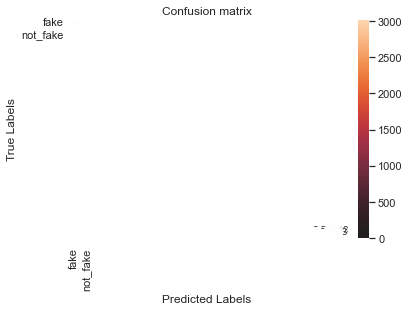

In [47]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['fake','not_fake'])
ax.yaxis.set_ticklabels(['fake','not_fake'])
plt.show()

In [48]:
conf_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)